In [36]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [39]:
diabetes = datasets.load_diabetes()
X = diabetes.data
Y = diabetes.target
diabetes.keys()
feature_names = diabetes.feature_names
print(X.shape)
Y = Y.reshape(-1,1) 
"""Questo parametro dice a NumPy di calcolare 
automaticamente la dimensione corretta lungo quella particolare dimensione. 
In altre parole, il -1 lascia che NumPy determini quanti elementi ci sono lungo l'asse indicato 
(in questo caso l'asse delle righe) in modo che il numero totale
degli elementi rimanga invariato."""
print(Y.shape)


(442, 10)
(442, 1)


andiamo a tracciare gli scatterplot per vedere con quale feature è ragionevole stimare un modello di regressione lineare

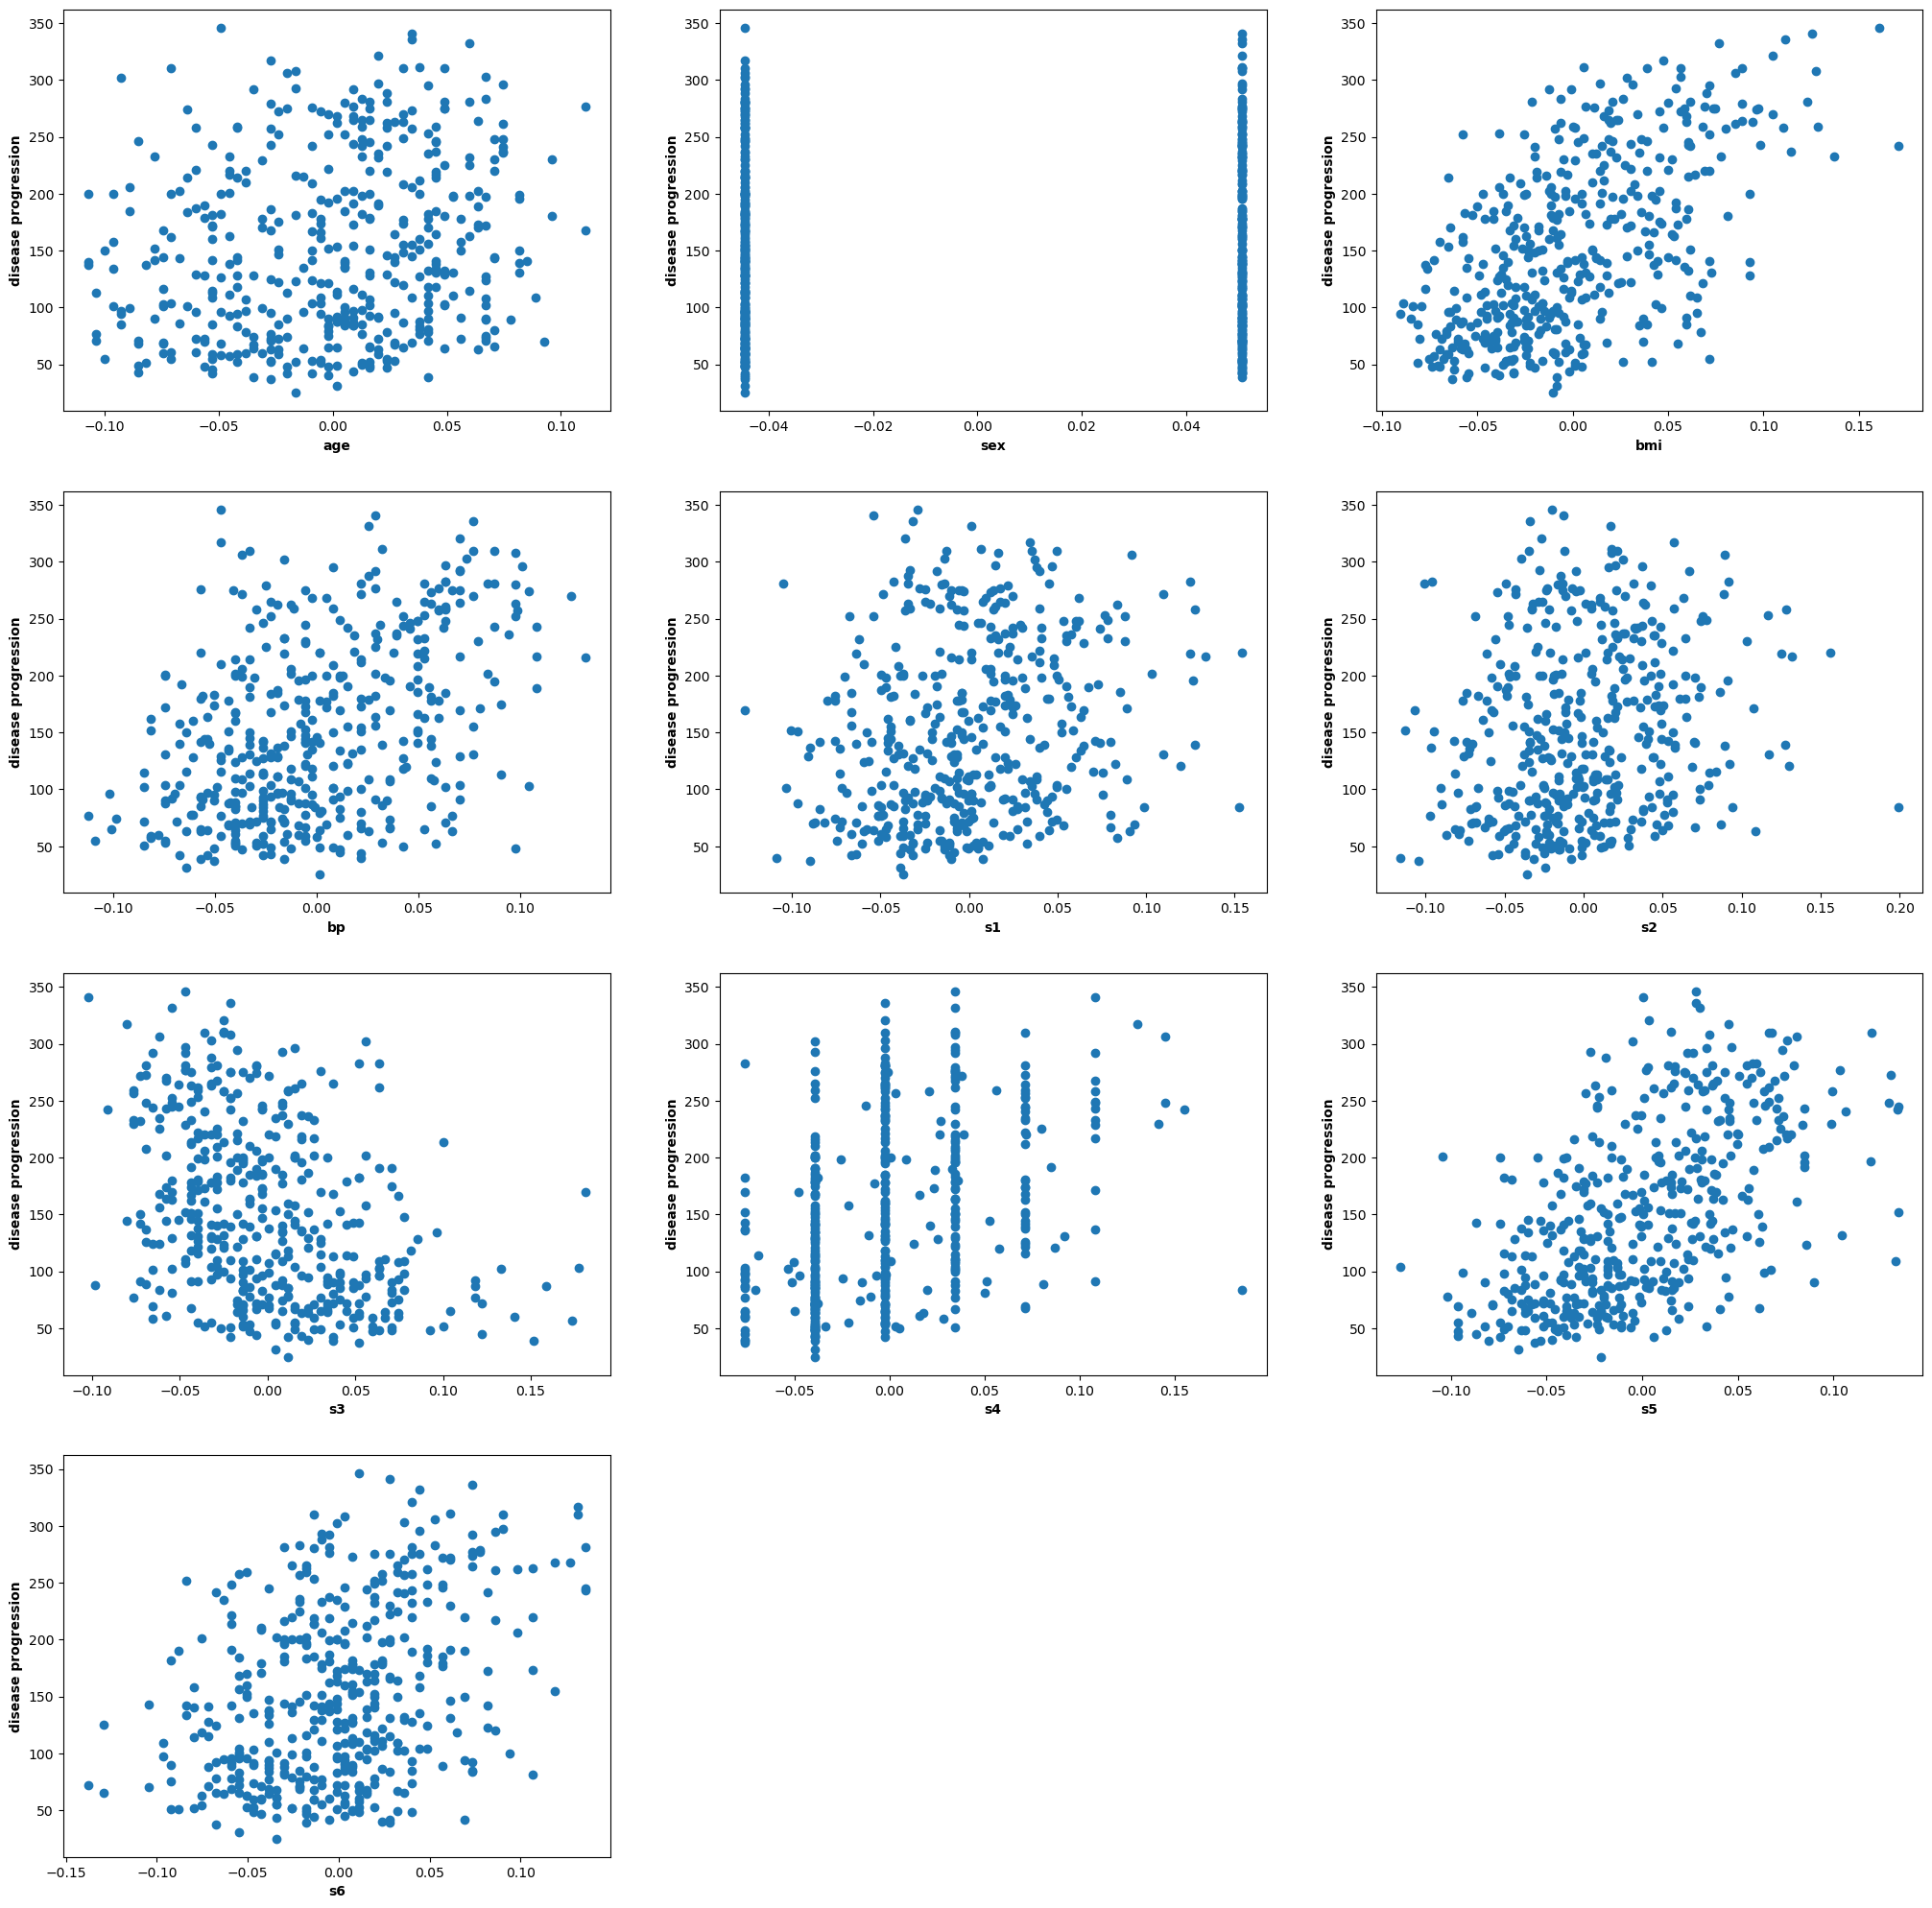

In [35]:
plt.figure(figsize=(25,25))
for idx, feature in enumerate(feature_names):
    plt.subplot(4,3, idx+1)
    plt.scatter(X[:,idx], Y, marker='o')
    plt.xlabel(feature, fontweight='bold')
    plt.ylabel('disease progression', fontweight = 'bold')
    
plt.show()

vediamo un correlazione lineare tra il target e il bmi(mody mass index)


In [48]:
bmi =X[:,np.newaxis, 2]

bmi_train, bmi_test, y_train, y_test = train_test_split(bmi, Y, test_size = 0.2, random_state = 4)
num_tr = len(bmi_train)
print(num_tr)
lm = linear_model.LinearRegression()
lm.fit(bmi_train, y_train)
y_prediction = lm.predict(bmi_test)
#coefficients
print("Coefficients:\n", lm.intercept_, " ",lm.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_prediction))
print("Coefficient of determination: %.2f" %r2_score(y_test, y_prediction))
#usando invece la funzione di score di linearregression()
print("R2: %.2f" %lm.score(bmi_test, y_test))


353
Coefficients:
 [151.18774341]   [[923.51473399]]
Mean squared error: 3184.92
Coefficient of determination: 0.42
R2: 0.42


qui vediamo che nell'insieme di test, il valore della bontà di adattamento è 0.42, il che vuol dire che circa il 40% della variabile risposta(o meglio dell'errore)

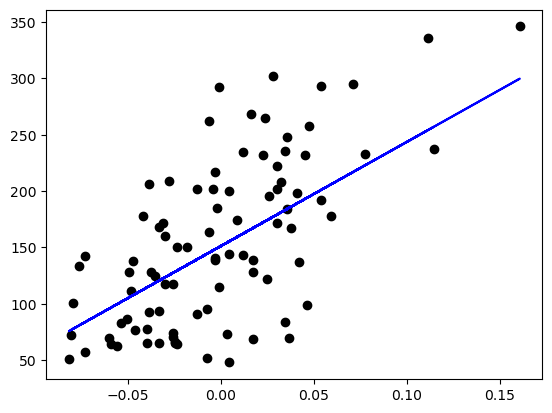

In [52]:
plt.scatter(bmi_test, y_test, color = 'black')
plt.plot(bmi_test, y_prediction, color = 'blue')
#plt.xticks(())
#plt.yticks(())

plt.show()